In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [19]:
class PCA:
    def __init__(self, n_components = 2):
        self.n_components = n_components
    
    def standardize(self, X):
        #translate the mean to zero
        X = X - np.mean(X, axis = 0)
        #normalize the variance
        X = X / np.std(X, axis = 0)
        
        return X
    
    def covariance(self, X):
        C = np.dot(X.T, X) / (self.n_rows - 1)
        return C
    
    def eigenvectors(self, X):
        eigvals, eigvects = np.linalg.eig(X)
        
        #find the most variability in the eigenvalues
        sorted_indices = np.argsort(eigvals)
        inversed = sorted_indices[::-1]
        cols = inversed[:self.n_components]
        
        new_space = eigvects[:,cols]
        return new_space
        
        
    def fit(self, X):
        self.n_rows = X.shape[0]
        #standerdize the data matrix
        A = self.standardize(X)
        #compute the covariance matrix
        C = self.covariance(A)
        #compute the needed eigenvectors, eigenvalues
        vects = self.eigenvectors(C)
        #compute the new data
        D = np.dot(A, vects)
        
        return D

In [20]:
data = pd.read_csv("C:/Users/ASUS/Downloads/Pizza.csv")
data.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [22]:
data.drop("id", axis = 1, inplace = True)
data.drop("brand", axis = 1, inplace = True)

In [23]:
data.head()

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [26]:
pca_ = PCA()
new_data = pca_.fit(data)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


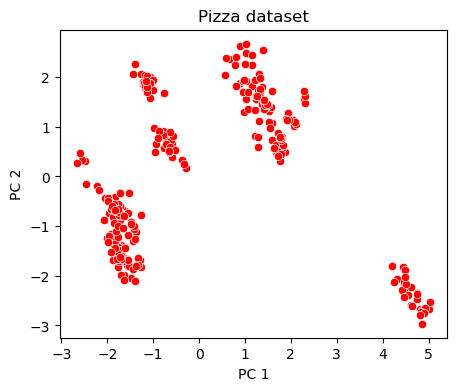

In [32]:
fig, ax = plt.subplots(1,1, figsize = (5,4))
sns.scatterplot(new_data[:,0], new_data[:,1], color = 'r')
ax.set_title("Pizza dataset")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
plt.show()